Load Data

In [58]:
import pandas as pd

# Load the dataset
data = pd.read_csv("healthcare-dataset-stroke-data.csv")

# Display the first few rows
print(data.head())


      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  


Pre-Processing

In [59]:
# Display dataset information
print(data.info())

# Display column names
print("Column Names:", data.columns.tolist())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None
Column Names: ['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoki

In [60]:
# Get the shape of the dataset
print(f"Dataset contains {data.shape[0]} rows and {data.shape[1]} columns.")


Dataset contains 5110 rows and 12 columns.


In [61]:
# Count missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)


Missing Values:
 id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [62]:
# Unique values in each column
for column in data.columns:
    print(f"Unique values in '{column}':\n{data[column].unique()}\n")


Unique values in 'id':
[ 9046 51676 31112 ... 19723 37544 44679]

Unique values in 'gender':
['Male' 'Female' 'Other']

Unique values in 'age':
[6.70e+01 6.10e+01 8.00e+01 4.90e+01 7.90e+01 8.10e+01 7.40e+01 6.90e+01
 5.90e+01 7.80e+01 5.40e+01 5.00e+01 6.40e+01 7.50e+01 6.00e+01 5.70e+01
 7.10e+01 5.20e+01 8.20e+01 6.50e+01 5.80e+01 4.20e+01 4.80e+01 7.20e+01
 6.30e+01 7.60e+01 3.90e+01 7.70e+01 7.30e+01 5.60e+01 4.50e+01 7.00e+01
 6.60e+01 5.10e+01 4.30e+01 6.80e+01 4.70e+01 5.30e+01 3.80e+01 5.50e+01
 1.32e+00 4.60e+01 3.20e+01 1.40e+01 3.00e+00 8.00e+00 3.70e+01 4.00e+01
 3.50e+01 2.00e+01 4.40e+01 2.50e+01 2.70e+01 2.30e+01 1.70e+01 1.30e+01
 4.00e+00 1.60e+01 2.20e+01 3.00e+01 2.90e+01 1.10e+01 2.10e+01 1.80e+01
 3.30e+01 2.40e+01 3.40e+01 3.60e+01 6.40e-01 4.10e+01 8.80e-01 5.00e+00
 2.60e+01 3.10e+01 7.00e+00 1.20e+01 6.20e+01 2.00e+00 9.00e+00 1.50e+01
 2.80e+01 1.00e+01 1.80e+00 3.20e-01 1.08e+00 1.90e+01 6.00e+00 1.16e+00
 1.00e+00 1.40e+00 1.72e+00 2.40e-01 1.64e+00 1.56e+0

In [63]:
# Check for duplicate rows
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")


Number of duplicate rows: 0


In [64]:
# summary for numeric columns
print(data.describe())

# summary for categorical columns
print(data.describe(include=["object"]))


                 id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%           114.090000    33.100000     0

In [65]:
# List of categorical columns to check
columns_to_check = ["gender", "smoking_status", "work_type"]

# Iterate through each column and display unique values
for column in columns_to_check:
    print(f"Unique values in '{column}':")
    print(data[column].value_counts())
    print("\n")


Unique values in 'gender':
gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64


Unique values in 'smoking_status':
smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64


Unique values in 'work_type':
work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64




In [66]:
# Display the number of rows before removing nulls
print(f"Rows before removing nulls: {data.shape[0]}")

# Remove rows with null values
data_cleaned = data.dropna()

# Display the number of rows after removing nulls
print(f"Rows after removing nulls: {data_cleaned.shape[0]}")


Rows before removing nulls: 5110
Rows after removing nulls: 4909


EDA

In [67]:
# Drop rows where work type is 'never_worked' and gender is 'other'
rows_to_drop = data_cleaned[(data_cleaned["work_type"] == "Never_worked") | (data_cleaned["gender"] == "Other")].index

# Drop the identified rows
data = data_cleaned.drop(index=rows_to_drop)

# Display the number of rows after dropping
print(f"Rows after dropping: {data.shape[0]}")

# Verify the rows have been dropped
print(data["work_type"].value_counts())
print(data["gender"].value_counts())


Rows after dropping: 4886
work_type
Private          2810
Self-employed     775
children          671
Govt_job          630
Name: count, dtype: int64
gender
Female    2886
Male      2000
Name: count, dtype: int64


In [68]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


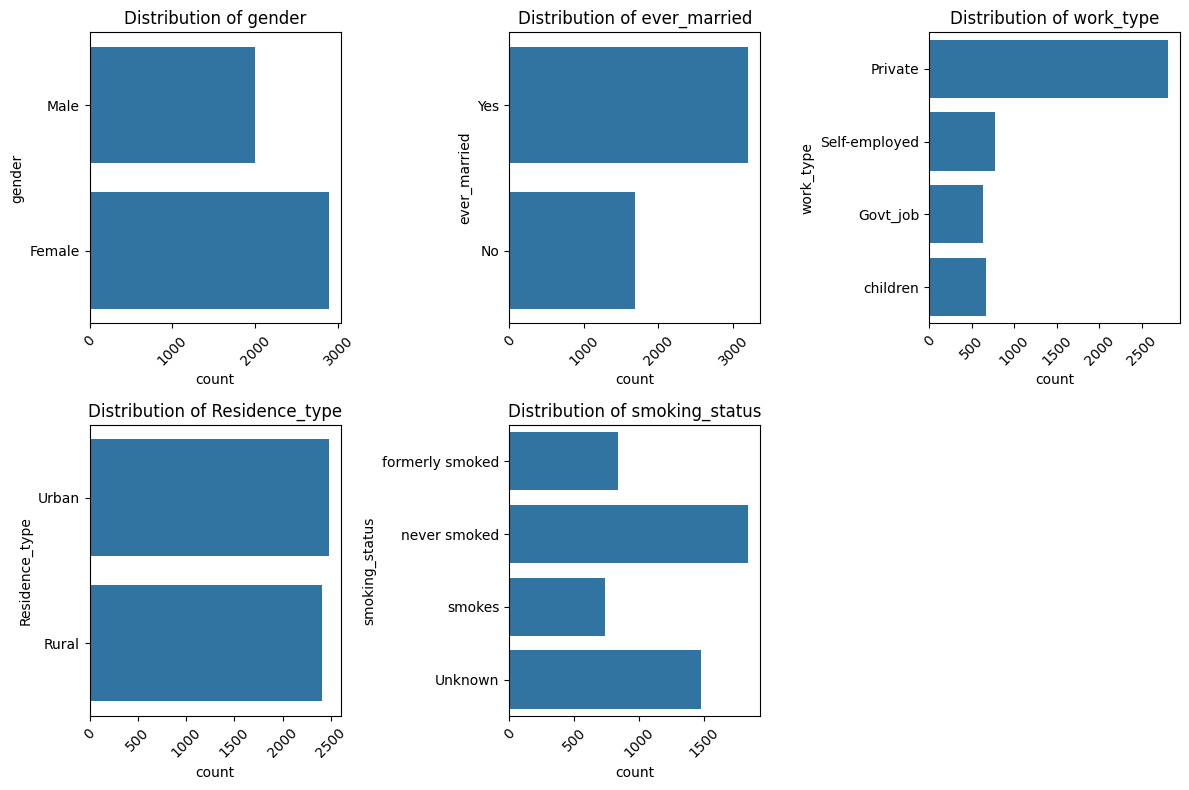

In [69]:
# Check value counts for categorical variables
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Plot categorical variables
plt.figure(figsize=(12, 8))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data[col])
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


               age  avg_glucose_level          bmi
count  4886.000000        4886.000000  4886.000000
mean     42.988973         105.339073    28.909640
std      22.534968          44.481347     7.853621
min       0.080000          55.120000    10.300000
25%      25.000000          77.062500    23.600000
50%      45.000000          91.680000    28.100000
75%      60.000000         113.545000    33.100000
max      82.000000         271.740000    97.600000


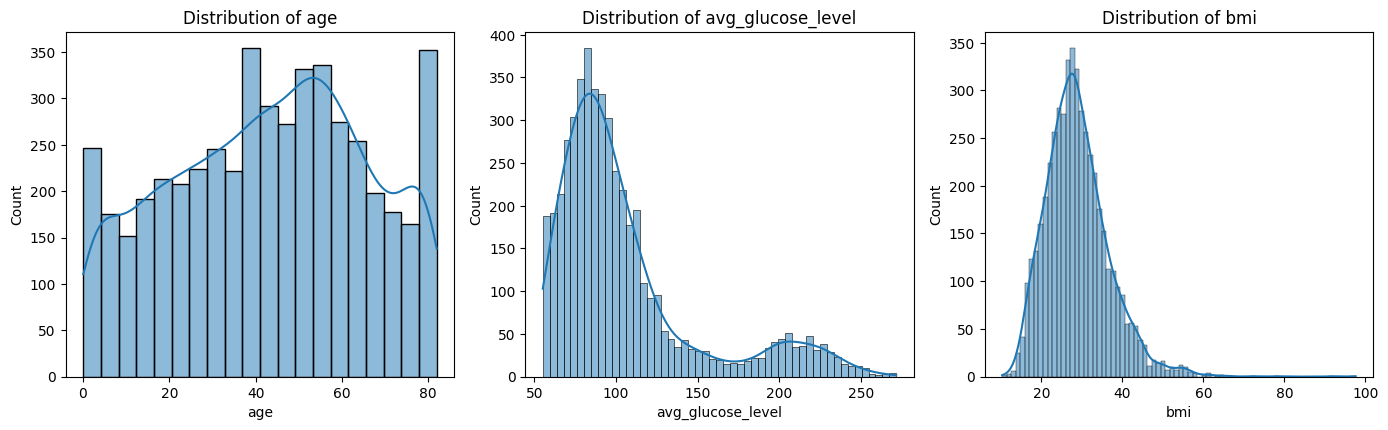

In [70]:
# List of numerical columns
numerical_columns = ['age', 'avg_glucose_level', 'bmi']

# Check summary statistics
print(data[numerical_columns].describe())

# Visualize distributions of numerical columns
plt.figure(figsize=(14, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[col], kde=True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()


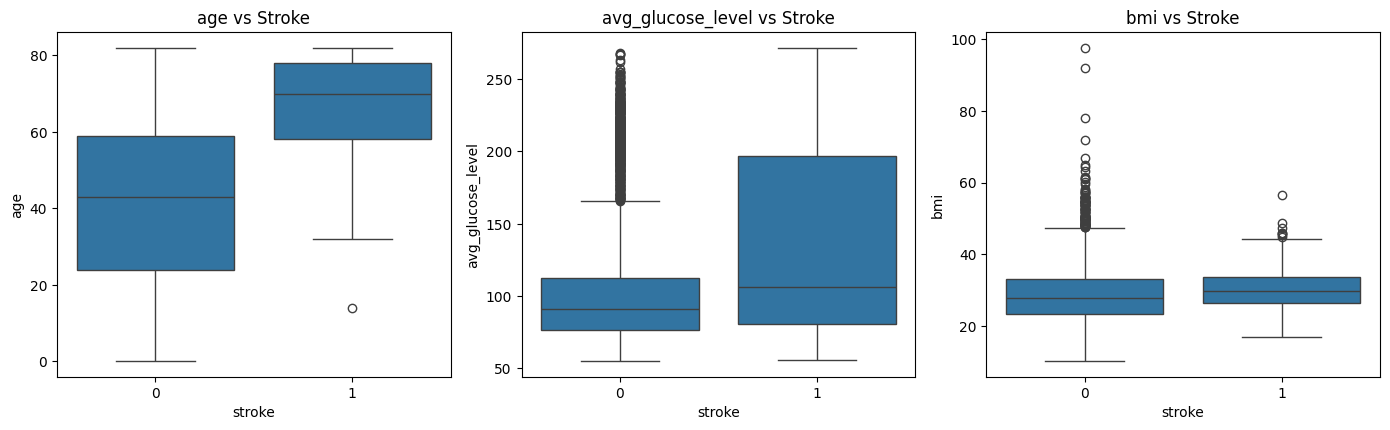

In [71]:
# Box plots to visualize the distribution of numerical features based on stroke (target)
plt.figure(figsize=(14, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='stroke', y=col, data=data)
    plt.title(f"{col} vs Stroke")
plt.tight_layout()
plt.show()


One Hot Encoding

In [72]:
# Apply one-hot encoding
data_encoded = pd.get_dummies(
    data, 
    columns=["gender", "ever_married", "work_type", "Residence_type", "smoking_status"], 
    drop_first=True  # To avoid multicollinearity for Logistic Regression
)
data_encoded = data_encoded.astype(int)
# Display encoded data
print(data_encoded.head())


      id  age  hypertension  heart_disease  avg_glucose_level  bmi  stroke  \
0   9046   67             0              1                228   36       1   
2  31112   80             0              1                105   32       1   
3  60182   49             0              0                171   34       1   
4   1665   79             1              0                174   24       1   
5  56669   81             0              0                186   29       1   

   gender_Male  ever_married_Yes  work_type_Private  work_type_Self-employed  \
0            1                 1                  1                        0   
2            1                 1                  1                        0   
3            0                 1                  1                        0   
4            0                 1                  0                        1   
5            1                 1                  1                        0   

   work_type_children  Residence_type_Urban  smoki

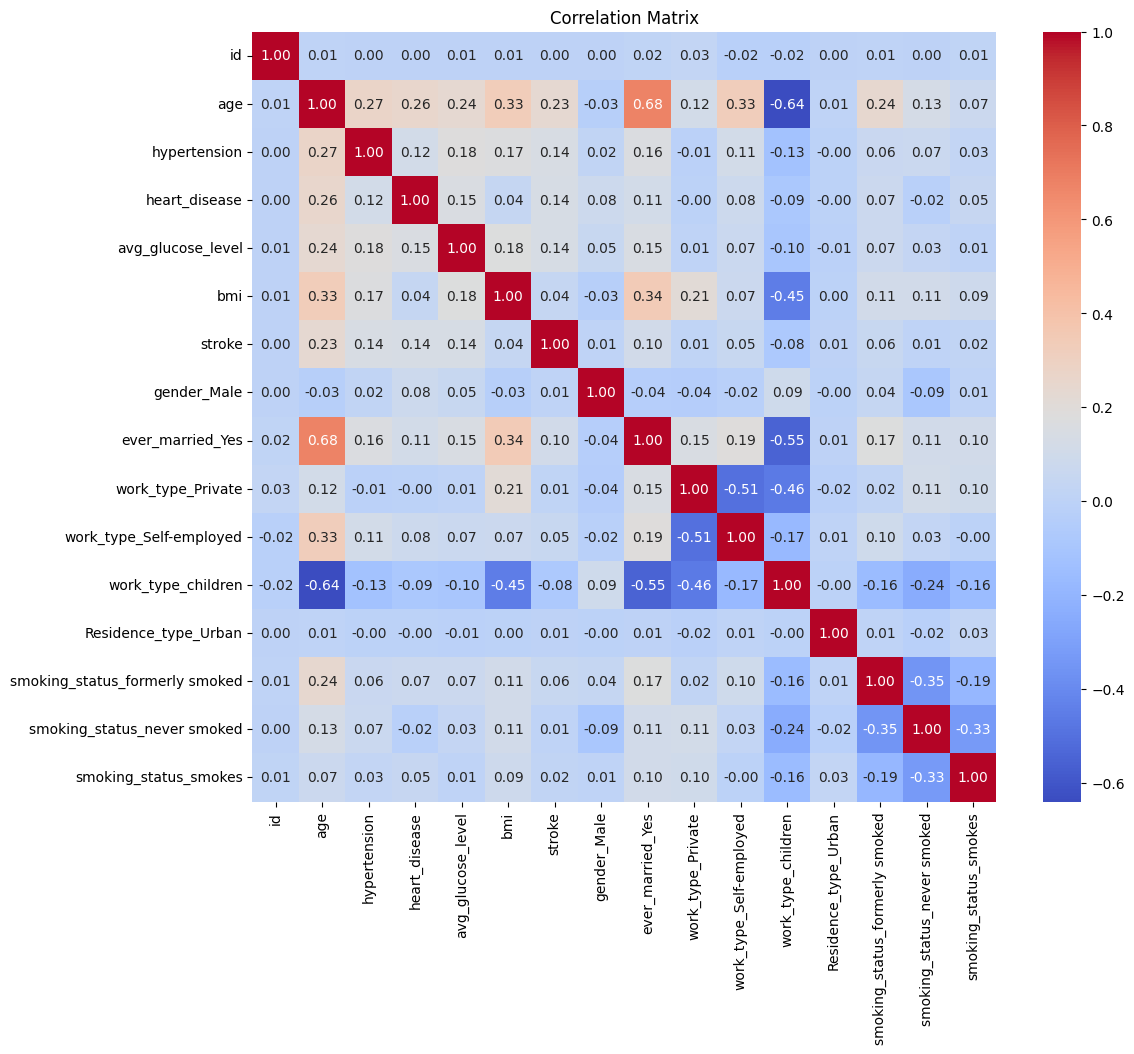

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = data_encoded.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title("Correlation Matrix")
plt.show()


VIF= 1/
1−R 
2

​
Interpret the VIF values:

VIF = 1: No correlation with other features.

1 < VIF < 5: Moderate correlation.VIF ≥ 5 or 10: High correlation (potential multicollinearity).

In [74]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


# Select only the features (excluding the target and categorical ones)
features = data_encoded.drop(columns=['stroke', 'id'])

# Add constant to the model (intercept term)
features_with_const = add_constant(features)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = features_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(features_with_const.values, i) 
                   for i in range(features_with_const.shape[1])]

# Display the VIF values
print(vif_data)


                           Feature        VIF
0                            const  41.407150
1                              age   2.856589
2                     hypertension   1.121123
3                    heart_disease   1.109198
4                avg_glucose_level   1.108985
5                              bmi   1.315647
6                      gender_Male   1.026189
7                 ever_married_Yes   1.979665
8                work_type_Private   2.353302
9          work_type_Self-employed   1.926365
10              work_type_children   3.266065
11            Residence_type_Urban   1.001897
12  smoking_status_formerly smoked   1.611436
13     smoking_status_never smoked   1.812647
14           smoking_status_smokes   1.532497


Logistic Regression

In [75]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# data_encoded is preprocessed dataset

X = data_encoded.drop(['id', 'stroke'], axis=1)  # Features
y = data_encoded['stroke']  # Target

# List of one-hot encoded columns
columns_to_exclude = ['gender_Male', 'ever_married_Yes', 'work_type_Private', 
                      'work_type_Self-employed', 'work_type_children', 
                      'Residence_type_Urban', 'smoking_status_formerly smoked', 
                      'smoking_status_never smoked', 'smoking_status_smokes']

# Select only the numeric columns (excluding the one-hot encoded columns)
X_numeric = X.drop(columns=columns_to_exclude)

# Standardize the numeric columns
scaler = StandardScaler()
X_numeric_scaled = scaler.fit_transform(X_numeric)

# Create a DataFrame for the scaled numeric columns
X_numeric_scaled_df = pd.DataFrame(X_numeric_scaled, columns=X_numeric.columns)

# Concatenate the scaled numeric columns with the one-hot encoded columns
X_scaled = pd.concat([X_numeric_scaled_df, X[columns_to_exclude].reset_index(drop=True)], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model with class weights balanced
log_reg = LogisticRegression(random_state=42, class_weight='balanced')

# Perform cross-validation
cv_scores = cross_val_score(log_reg, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Cross-Validation Accuracy: {cv_scores.mean():.4f}")

# Train the model on the training data
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Cross-Validation Accuracy Scores: [0.74040921 0.72506394 0.75191816 0.74519846 0.73495519]
Mean Cross-Validation Accuracy: 0.7395
Test Set Accuracy: 0.7556
Confusion Matrix:
[[693 231]
 [  8  46]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.75      0.85       924
           1       0.17      0.85      0.28        54

    accuracy                           0.76       978
   macro avg       0.58      0.80      0.57       978
weighted avg       0.94      0.76      0.82       978



AUC Score: 0.8590


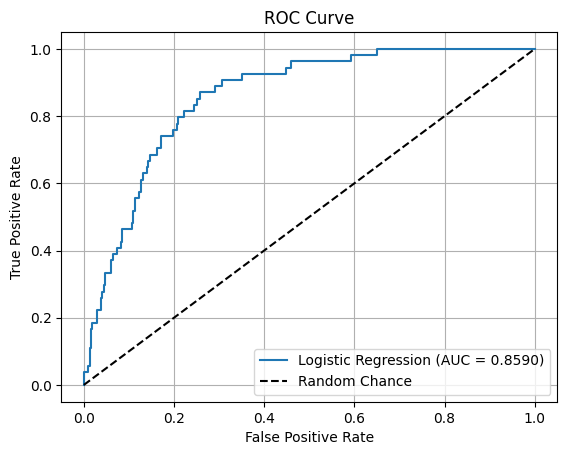

In [76]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_prob)
print(f"AUC Score: {auc_score:.4f}")

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


Accuracy: 0.7556
Confusion Matrix:
[[693 231]
 [  8  46]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.75      0.85       924
           1       0.17      0.85      0.28        54

    accuracy                           0.76       978
   macro avg       0.58      0.80      0.57       978
weighted avg       0.94      0.76      0.82       978



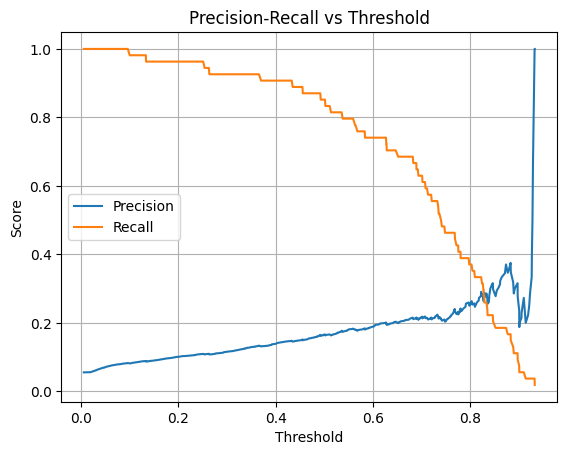

In [77]:
# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot Precision-Recall vs. Threshold curve
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Get the predicted probabilities for the positive class
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]

# Calculate precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Plot Precision-Recall vs. Threshold
plt.plot(thresholds, precision[:-1], label="Precision")
plt.plot(thresholds, recall[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()
plt.title("Precision-Recall vs Threshold")
plt.grid()
plt.show()


In [92]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.0001, 0.0003, 0.0005],  # Regularization strengths
    'solver': ['liblinear', 'lbfgs'],  # Solvers
    'penalty': ['l2']  # L2 regularization
}

# Initialize the Logistic Regression model
log_reg = LogisticRegression(random_state=42, class_weight='balanced')

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='f1', verbose=1)
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)

# Use the best model
best_model = grid_search.best_estimator_


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Parameters: {'C': 0.0003, 'penalty': 'l2', 'solver': 'lbfgs'}
Best F1 Score: 0.19503589310257052


In [93]:
# Make predictions with the best model
y_pred = best_model.predict(X_test)

# Evaluate performance
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[727 197]
 [ 10  44]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.79      0.88       924
           1       0.18      0.81      0.30        54

    accuracy                           0.79       978
   macro avg       0.58      0.80      0.59       978
weighted avg       0.94      0.79      0.84       978



 Adjust the Decision Threshold

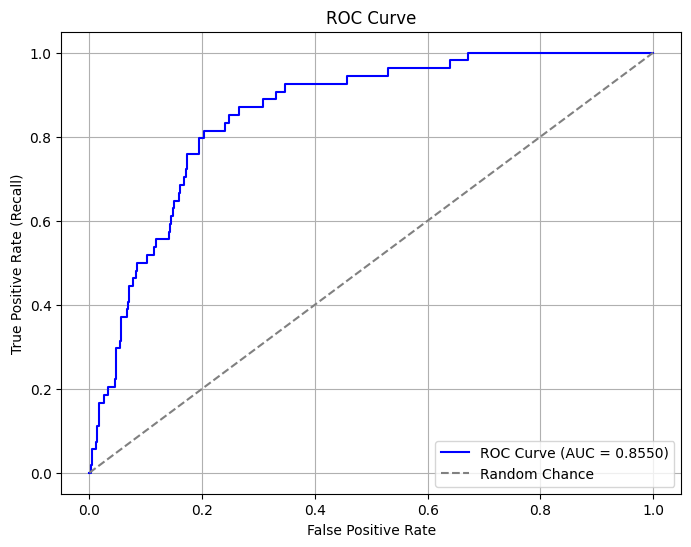

In [94]:
# Get predicted probabilities for the positive class (stroke=1) using the best model
y_pred_prob = best_model.predict_proba(X_test)[:, 1]

# Compute FPR, TPR, and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc_score = roc_auc_score(y_test, y_pred_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.4f})", color="blue")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Chance")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.legend()
plt.grid()
plt.show()

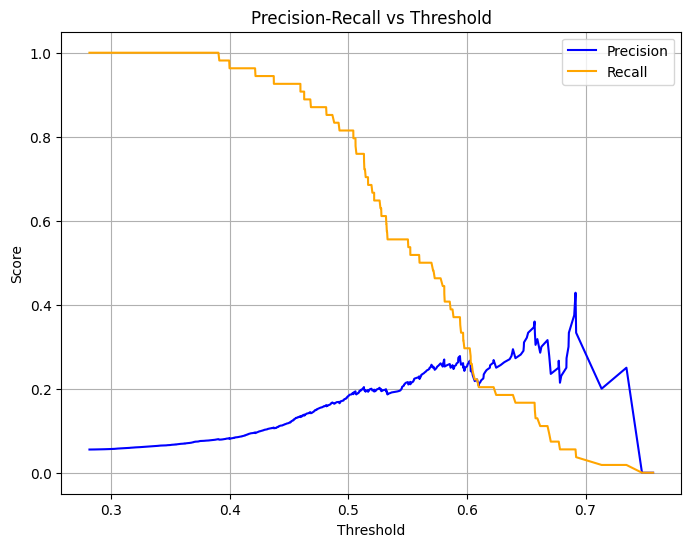

In [95]:
from sklearn.metrics import precision_recall_curve

# Compute precision, recall, and thresholds using the best model
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Plot Precision-Recall vs Threshold
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision[:-1], label="Precision", color="blue")
plt.plot(thresholds, recall[:-1], label="Recall", color="orange")
plt.title("Precision-Recall vs Threshold")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()
plt.grid()
plt.show()


In [98]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

# Adjust the decision threshold
optimal_threshold = 0.60  # Example threshold
y_pred_custom = (best_model.predict_proba(X_test)[:, 1] >= optimal_threshold).astype(int)

# Evaluate the new predictions
print("Confusion Matrix with Custom Threshold:")
print(confusion_matrix(y_test, y_pred_custom))
print("\nClassification Report with Custom Threshold:")
print(classification_report(y_test, y_pred_custom))

# Calculate and print AUC score
y_pred_prob = best_model.predict_proba(X_test)[:, 1]  # Predicted probabilities
auc_score = roc_auc_score(y_test, y_pred_prob)
print(f"AUC Score with Custom Threshold: {auc_score:.4f}")


Confusion Matrix with Custom Threshold:
[[877  47]
 [ 38  16]]

Classification Report with Custom Threshold:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       924
           1       0.25      0.30      0.27        54

    accuracy                           0.91       978
   macro avg       0.61      0.62      0.61       978
weighted avg       0.92      0.91      0.92       978

AUC Score with Custom Threshold: 0.8550


LGBM (Light Gradient Boosting Machine)

In [25]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train the LGBMClassifier
lgbm_model = lgb.LGBMClassifier(random_state=42, class_weight='balanced')
lgbm_model.fit(X_train, y_train)

# Predict probabilities for the test set (positive class)
y_pred_prob = lgbm_model.predict_proba(X_test)[:, 1]

# Save predicted probabilities and test labels for ROC curve
import joblib
joblib.dump((y_test, y_pred_prob), "roc_data.pkl")

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, lgbm_model.predict(X_test)))
print("Classification Report:")
print(classification_report(y_test, lgbm_model.predict(X_test)))



[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 155, number of negative: 3753
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000852 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 346
[LightGBM] [Info] Number of data points in the train set: 3908, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
Confusion Matrix:
[[873  51]
 [ 41  13]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       924
           1       0.20      0.24      0.22        54

    accuracy                           0.91       978
   macro avg       0.58      0.59      0.59       978
weighted avg       0.91      0.91

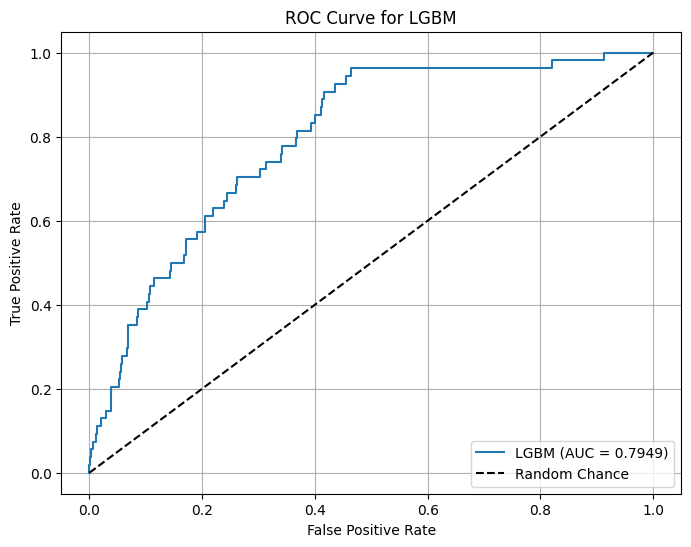

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
import joblib

# Load the saved ROC data
y_test, y_pred_prob = joblib.load("roc_data.pkl")

# Compute the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc_score = roc_auc_score(y_test, y_pred_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'LGBM (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for LGBM')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [99]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Calculate scale_pos_weight
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

# Initialize and train the LGBMClassifier with scale_pos_weight
lgbm_model = lgb.LGBMClassifier(random_state=42, scale_pos_weight=scale_pos_weight)
lgbm_model.fit(X_train, y_train)

# Predict probabilities for the test set (positive class)
y_pred_prob = lgbm_model.predict_proba(X_test)[:, 1]

# Save predicted probabilities and test labels for ROC curve
import joblib
joblib.dump((y_test, y_pred_prob), "roc_data.pkl")

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, lgbm_model.predict(X_test)))
print("\nClassification Report:")
print(classification_report(y_test, lgbm_model.predict(X_test)))

# Calculate and display AUC score
auc_score = roc_auc_score(y_test, y_pred_prob)
print(f"\nAUC Score: {auc_score:.4f}")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 155, number of negative: 3753
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000247 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 346
[LightGBM] [Info] Number of data points in the train set: 3908, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.039662 -> initscore=-3.186886
[LightGBM] [Info] Start training from score -3.186886
Confusion Matrix:
[[868  56]
 [ 42  12]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       924
           1       0.18      0.22      0.20        54

    accuracy                           0.90       978
   macro avg       0.57      0.58      0.57       978
weighted avg       0.91      0

In [27]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Define the parameter distribution
param_distributions = {
    'num_leaves': randint(15, 100),  # Random values between 15 and 100
    'learning_rate': uniform(0.01, 0.2),  # Random values between 0.01 and 0.21
    'n_estimators': randint(50, 300),  # Random values between 50 and 300
    'boosting_type': ['gbdt'],  # Gradient Boosting Decision Tree (fixed)
    'class_weight': ['balanced'],  # Fixed to handle class imbalance
}

# Set up the LGBMClassifier
lgbm = lgb.LGBMClassifier(random_state=42)

# Perform random search
random_search = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=param_distributions,
    n_iter=50,  # Number of random samples to try
    cv=5,  # 5-fold cross-validation
    scoring='f1',  # Use F1-score for evaluation
    random_state=42,
    verbose=1
)
random_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best F1 Score:", random_search.best_score_)

# Use the best model
best_lgbm_model = random_search.best_estimator_

# Make predictions with the best model
y_pred_best = best_lgbm_model.predict(X_test)
y_pred_prob_best = best_lgbm_model.predict_proba(X_test)[:, 1]

# Evaluate the fine-tuned model
print("Confusion Matrix with Best Model:")
print(confusion_matrix(y_test, y_pred_best))
print("Classification Report with Best Model:")
print(classification_report(y_test, y_pred_best))
print(f"AUC Score with Best Model: {roc_auc_score(y_test, y_pred_prob_best):.4f}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 124, number of negative: 3002
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000109 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 336
[LightGBM] [Info] Number of data points in the train set: 3126, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 124, number of negative: 3002
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000099 seconds.
You can set `force_row_wise=true` to remove the overh

In [28]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'num_leaves': [30,35,40],  # Maximum leaves in one tree
    'learning_rate': [0.006, 0.008, 0.1],  # Step size shrinkage
    'n_estimators': [220, 250, 280],  # Number of boosting iterations
    'boosting_type': ['gbdt'],  # Gradient Boosting Decision Tree
    'class_weight': ['balanced'],  # Addressing class imbalance
}

# Set up the LGBMClassifier
lgbm = lgb.LGBMClassifier(random_state=42)

# Perform grid search
grid_search = GridSearchCV(estimator=lgbm, param_grid=param_grid, cv=5, scoring='f1', verbose=1)
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)

# Use the best model
best_lgbm_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred_best = best_lgbm_model.predict(X_test)
y_pred_prob_best = best_lgbm_model.predict_proba(X_test)[:, 1]

# Evaluate the fine-tuned model
print("Confusion Matrix with Best Model:")
print(confusion_matrix(y_test, y_pred_best))
print("Classification Report with Best Model:")
print(classification_report(y_test, y_pred_best))
print(f"AUC Score with Best Model: {roc_auc_score(y_test, y_pred_prob_best):.4f}")


Fitting 5 folds for each of 27 candidates, totalling 135 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 124, number of negative: 3002
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000129 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 336
[LightGBM] [Info] Number of data points in the train set: 3126, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 124, number of negative: 3002
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000101 seconds.
You can set `force_row_wise=true` to remove the overh

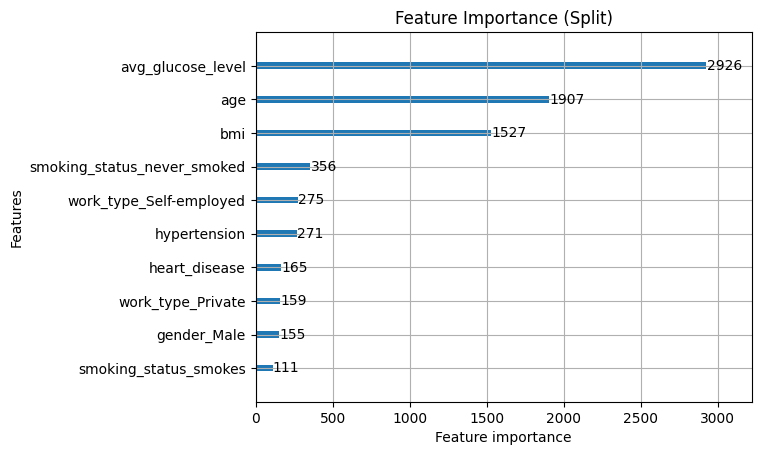

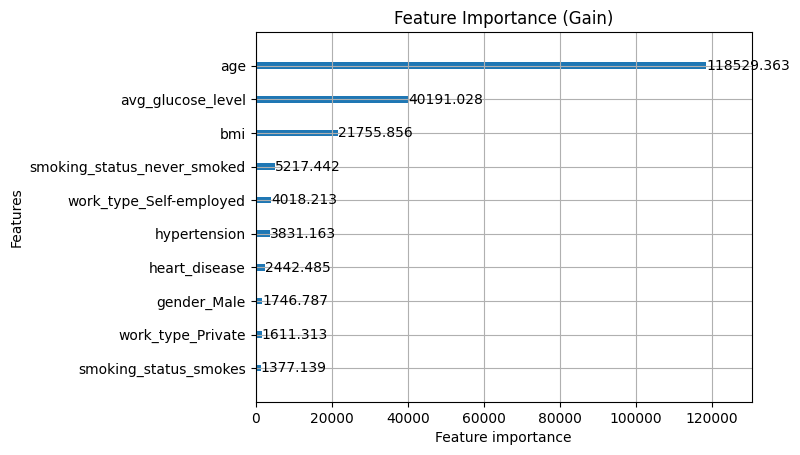

In [29]:
# Access the Booster object
booster = best_lgbm_model.booster_

# Plot feature importance using LightGBM's built-in function
import lightgbm as lgb
lgb.plot_importance(booster, max_num_features=10, importance_type='split')
plt.title("Feature Importance (Split)")
plt.show()

# You can also use 'gain' as the importance_type for alternative ranking
lgb.plot_importance(booster, max_num_features=10, importance_type='gain')
plt.title("Feature Importance (Gain)")
plt.show()
